Practice Phase 4 of 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sklearn

In [3]:
df=pd.read_excel('Data_Train.xlsx')

In [4]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


 This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.calculated based on their Cost which it contains both numerical and categorical data are present.Here 'Cost' is the target variable which contains continous value so it will be terms of Regression problem where we need to predict the Cost.

EDA(Exploratory Data Analysis)

In [5]:
df.shape

(12690, 9)

This dataset contains 12690 rows and 9 columns ,out of which 1 target variable and remaining 8 are independent variables.

In [6]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [7]:
df.columns.tolist()

['TITLE',
 'RESTAURANT_ID',
 'CUISINES',
 'TIME',
 'CITY',
 'LOCALITY',
 'RATING',
 'VOTES',
 'COST']

To check the data types of the columns

In [8]:
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


<Axes: >

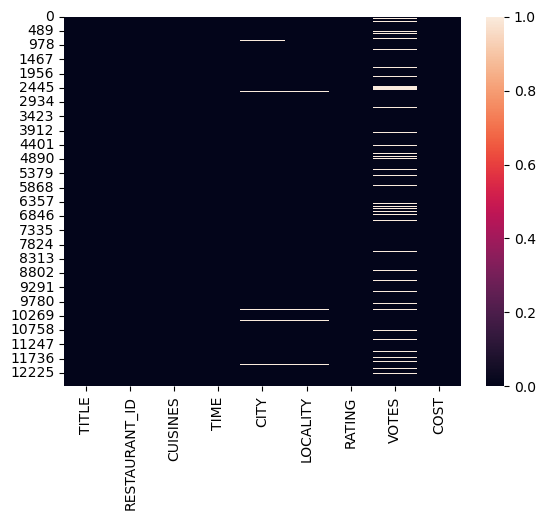

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.loc[df['RATING']== "-"]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
13,CASUAL DINING,4319,South Indian,11am – 11:30pm (Mon-Sun),Kochi,Edappally,-,NaN,400
85,QUICK BITES,12657,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,-,NaN,300
156,QUICK BITES,6302,South Indian,6am – 8pm (Mon-Sun),Kochi,Vyttila,-,NaN,400
178,CASUAL DINING,14064,"Indian, Chinese",12noon – 11:30pm (Mon-Sun),Kochi,Vennala,-,NaN,400
235,QUICK BITES,14990,Kerala,8am – 7pm (Mon-Sun),Kochi,Near Marine Drive,-,NaN,50
...,...,...,...,...,...,...,...,...,...
12584,QUICK BITES,11842,"Kerala, Biryani",8am – 10pm (Mon-Sun),Kochi,Panampilly Nagar,-,NaN,300
12585,CASUAL DINING,5878,Kerala,6am – 4pm (Mon-Sun),Kochi,Elamkulam,-,NaN,400
12591,BEVERAGE SHOP,1167,"Beverages, Juices, Desserts",9am – 10pm (Mon-Sun),Kochi,Edappally,-,NaN,150
12641,CASUAL DINING,8312,Kerala,7:30am – 11:30pm (Mon-Sun),Kochi,Pallimukku,-,NaN,300


In [12]:
df['RATING']=df['RATING'].replace("-",np.nan)


In [13]:
df['RATING']=df['RATING'].replace("NEW",np.nan)

In [14]:
df['RATING'].value_counts()

3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
3.4     575
4.3     556
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64

As we can see above dataset there is most of the columns has nan value/missing values present in dataset so here we can't drop those columns instead we can manage using mean of the value here.

In [15]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING           1204
VOTES            1204
COST                0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         11486 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


As we can see rating has string datatype so here we have to change manually string data type to float data type.

In [17]:
df['RATING']=df['RATING'].astype(float)
df['RATING'].dtypes

dtype('float64')

Encoding technique (here we are using encoding method to change categorical data to numerical data.)

In [18]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        df

In [19]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31.0,9438,2627.0,739.0,320.0,285.0,3.6,1278.0,1200
1,33.0,13198,289.0,1885.0,67.0,1046.0,4.2,950.0,1500
2,31.0,10915,2976.0,661.0,67.0,1101.0,3.8,712.0,800
3,95.0,6346,4130.0,275.0,222.0,136.0,4.1,787.0,800
4,50.0,15387,1766.0,615.0,222.0,620.0,3.8,470.0,300
...,...,...,...,...,...,...,...,...,...
12685,95.0,13228,2934.0,1144.0,131.0,342.0,3.8,1349.0,500
12686,33.0,9686,2143.0,1177.0,222.0,133.0,4.3,191.0,1800
12687,71.0,11133,2088.0,1137.0,239.0,1342.0,4.0,1428.0,1300
12688,31.0,6134,3506.0,1837.0,67.0,631.0,3.5,996.0,400


In [20]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING           1204
VOTES            1204
COST                0
dtype: int64

In [21]:
df['CITY']=df['CITY'].fillna(df['CITY'].mean())

In [22]:
df['LOCALITY']=df['LOCALITY'].fillna(df['LOCALITY'].mean())

In [23]:
df['RATING']=df['RATING'].fillna(df['RATING'].mean())

In [24]:
df['VOTES']=df['VOTES'].fillna(df['VOTES'].mean())

In [25]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

<Axes: >

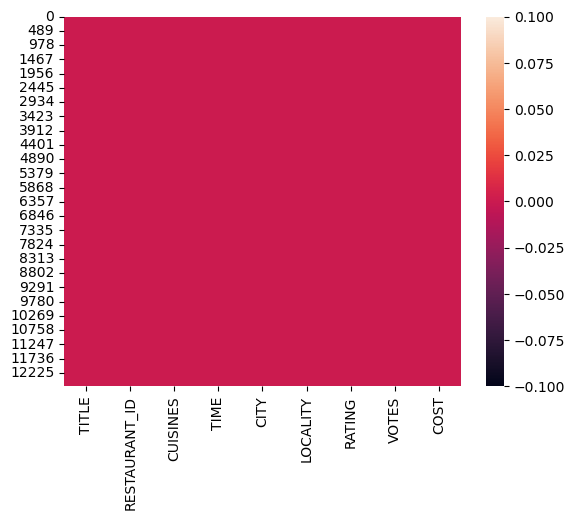

In [26]:
sns.heatmap(df.isnull())

As you can see visualy we filled all nan values to mean and now there is no nan /missing values present in the dataset.

Checking number of unique value in each columns.

In [27]:
df.nunique().to_frame('number of unique values')

,number of unique values
TITLE,113
RESTAURANT_ID,11892
CUISINES,4155
TIME,2689
CITY,360
LOCALITY,1417
RATING,31
VOTES,1848
COST,86


In [28]:
df.drop('RESTAURANT_ID',axis=1,inplace=True)

In [29]:
df['COST'].unique()

array([ 1200,  1500,   800,   300,   600,  1600,   200,   900,   400,
        1400,   350,   500,   450,   700,  1000,   250,  2000,  1100,
         100,   850,  2500,  1800,   150,   650,  3500,   750,   950,
        1300,   180,  2100,   550,    50,  1900,  1750,  1350,    60,
        2200,  5000,    80,  3300,  3800,  1450,  4000,  2800,   120,
        4500,  2400,  1700,  3000,  2600,  5200, 14000,  1550,  4200,
        3700,  1150,  2700,   130,  8000,  3200,  5500,  6500,  1050,
       10000,  3600,   313,  3400,  2300,  3100,  1250,    20,  1650,
        1850,  6000,   140,  4100,  4050,  2900,   599,  7000,   299,
         370,  1950,   320,  1260,    70], dtype=int64)

Description of dataset(it gives the statistical summary of numerical columns)

In [30]:
df.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.465721,2235.193932,1180.084003,142.951741,654.807259,3.785452,969.372366,655.252246
std,32.762427,1204.091664,754.459944,83.620201,398.175859,0.401565,477.691067,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,20.000000
25%,31.000000,1185.250000,555.000000,67.000000,337.000000,3.600000,619.000000,300.000000
50%,59.000000,2416.500000,1123.000000,131.000000,590.000000,3.800000,969.372366,500.000000
75%,95.000000,3222.750000,1847.000000,222.000000,1009.000000,4.000000,1341.000000,800.000000
max,112.000000,4154.000000,2688.000000,358.000000,1415.000000,4.900000,1846.000000,14000.000000


This gives the stastical information of the numerical columns.the summary of the above dataset looks perfect.since there is no negative /invalid values present. Here Mean is greater than Median means right skwness present in the dataset. As we can see 75th percentile and Max values are high so there is outliers present in the dataset.

Data Visulization

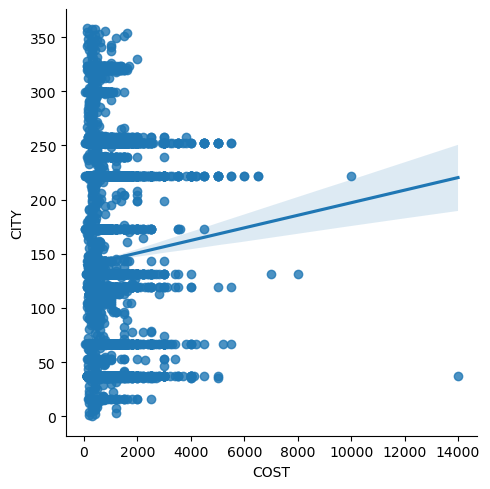

In [31]:
sns.lmplot(x='COST',y='CITY',data=df,palette='colorblind')

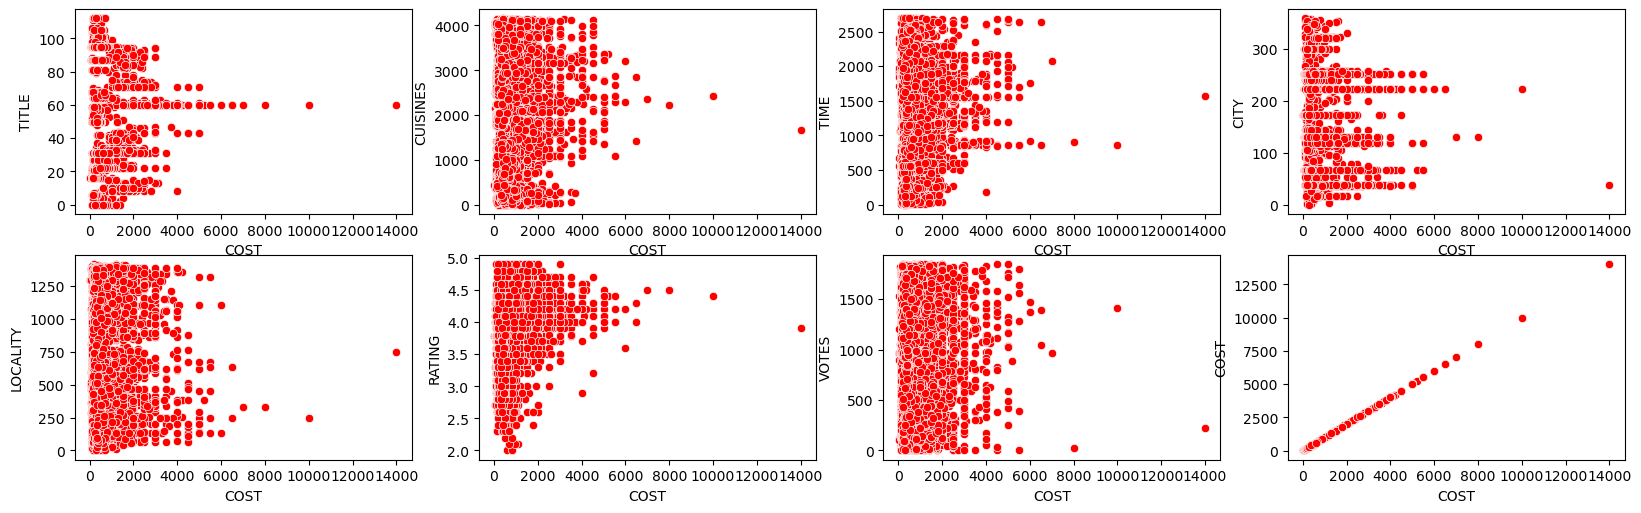

In [32]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(8,4,p)
        sns.scatterplot(x='COST',y=i,data=df,color='r')
        plt.xlabel('COST')
        plt.ylabel(i)
    p+=1
plt.show()

Here we are checking outliers.

TITLE          Axes(0.125,0.786098;0.0824468x0.0939024)
CUISINES    Axes(0.223936,0.786098;0.0824468x0.0939024)
TIME        Axes(0.322872,0.786098;0.0824468x0.0939024)
CITY        Axes(0.421809,0.786098;0.0824468x0.0939024)
LOCALITY    Axes(0.520745,0.786098;0.0824468x0.0939024)
RATING      Axes(0.619681,0.786098;0.0824468x0.0939024)
VOTES       Axes(0.718617,0.786098;0.0824468x0.0939024)
COST        Axes(0.817553,0.786098;0.0824468x0.0939024)
dtype: object

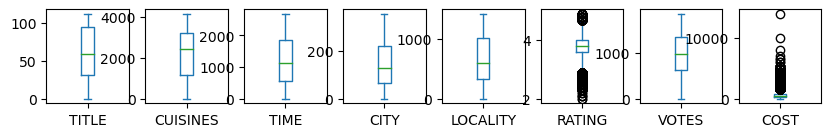

In [33]:
df.plot(kind='box',subplots=True,layout=(7,8),figsize=(10,10))

As we have found outliers in the column rating.To remove outliers Zscore is using before building the model

In [34]:
from scipy.stats import zscore
out_features=df[['RATING']]
z=np.abs(zscore(out_features))
z

,RATING
0,0.461841
1,1.032372
2,0.036230
3,0.783336
4,0.036230
...,...
12685,0.036230
12686,1.281407
12687,0.534301
12688,0.710876


In [35]:
threshold=3
np.where(z>3)

(array([  159,   599,   672,  1008,  1020,  1773,  1816,  1973,  2068,
         2188,  2778,  2921,  2969,  3170,  3206,  3397,  3483,  3491,
         3528,  4042,  4315,  4391,  4401,  4409,  4563,  5012,  5401,
         5531,  5590,  5682,  5947,  6303,  6445,  6486,  6592,  6626,
         6722,  6867,  7045,  7241,  7242,  7755,  7789,  7813,  8219,
         8801,  8941,  9141,  9264,  9272,  9330,  9570,  9575,  9659,
         9734,  9875, 10635, 10751, 10760, 11050, 11262, 11311, 11361,
        11558, 11589, 11595, 11899], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0], dtype=int64))

In [36]:
df1=df[(z<3).all(axis=1)]

In [37]:
df1.shape

(12623, 8)

In [38]:
print('old dataframe:',df.shape[0])
print('new dataframe:',df1.shape[0])

old dataframe: 12690
new dataframe: 12623


In [39]:
print('datalosspercentage:',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

datalosspercentage: 0.5279747832939322


As you can see there is less than 10% of data loss after removing the outliers so it is considerable

In [40]:
df1

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31.0,2627.0,739.0,320.0,285.0,3.6,1278.0,1200
1,33.0,289.0,1885.0,67.0,1046.0,4.2,950.0,1500
2,31.0,2976.0,661.0,67.0,1101.0,3.8,712.0,800
3,95.0,4130.0,275.0,222.0,136.0,4.1,787.0,800
4,50.0,1766.0,615.0,222.0,620.0,3.8,470.0,300
...,...,...,...,...,...,...,...,...
12685,95.0,2934.0,1144.0,131.0,342.0,3.8,1349.0,500
12686,33.0,2143.0,1177.0,222.0,133.0,4.3,191.0,1800
12687,71.0,2088.0,1137.0,239.0,1342.0,4.0,1428.0,1300
12688,31.0,3506.0,1837.0,67.0,631.0,3.5,996.0,400


checking the Skewness

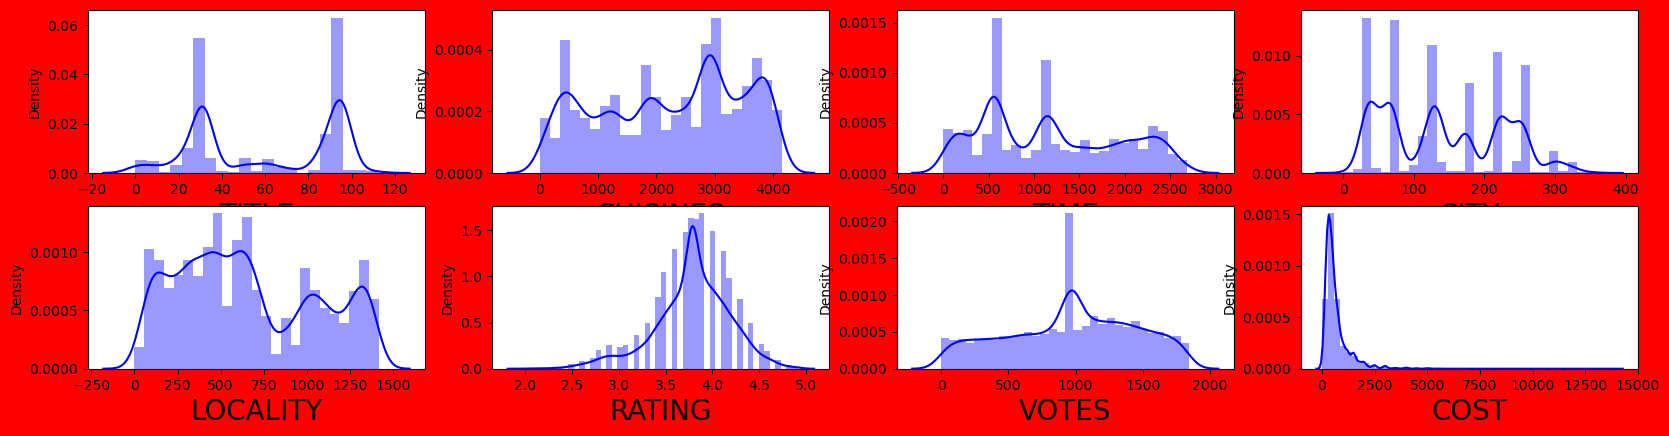

In [41]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=24:
        ax=plt.subplot(10,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()


In [42]:
df.skew()

TITLE      -0.069803
CUISINES   -0.218782
TIME        0.306186
CITY        0.251608
LOCALITY    0.340275
RATING     -0.537352
VOTES      -0.195937
COST        3.978801
dtype: float64

from above distribution plots we can notice that data in most looks normal columns except ,cost

Here we are checking correlation of the dataset.

In [43]:
df.corr()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.244866,0.053914,-0.012379,0.030218,-0.153494,0.002147,-0.263581
CUISINES,0.244866,1.000000,0.104741,0.023334,0.016228,-0.062355,-0.001486,-0.014078
TIME,0.053914,0.104741,1.000000,-0.010688,-0.007389,0.046717,0.009042,0.018248
CITY,-0.012379,0.023334,-0.010688,1.000000,0.037581,0.055839,0.001424,0.043472
LOCALITY,0.030218,0.016228,-0.007389,0.037581,1.000000,-0.025704,0.004061,-0.016109
RATING,-0.153494,-0.062355,0.046717,0.055839,-0.025704,1.000000,-0.009285,0.320065
VOTES,0.002147,-0.001486,0.009042,0.001424,0.004061,-0.009285,1.000000,0.004879
COST,-0.263581,-0.014078,0.018248,0.043472,-0.016109,0.320065,0.004879,1.000000


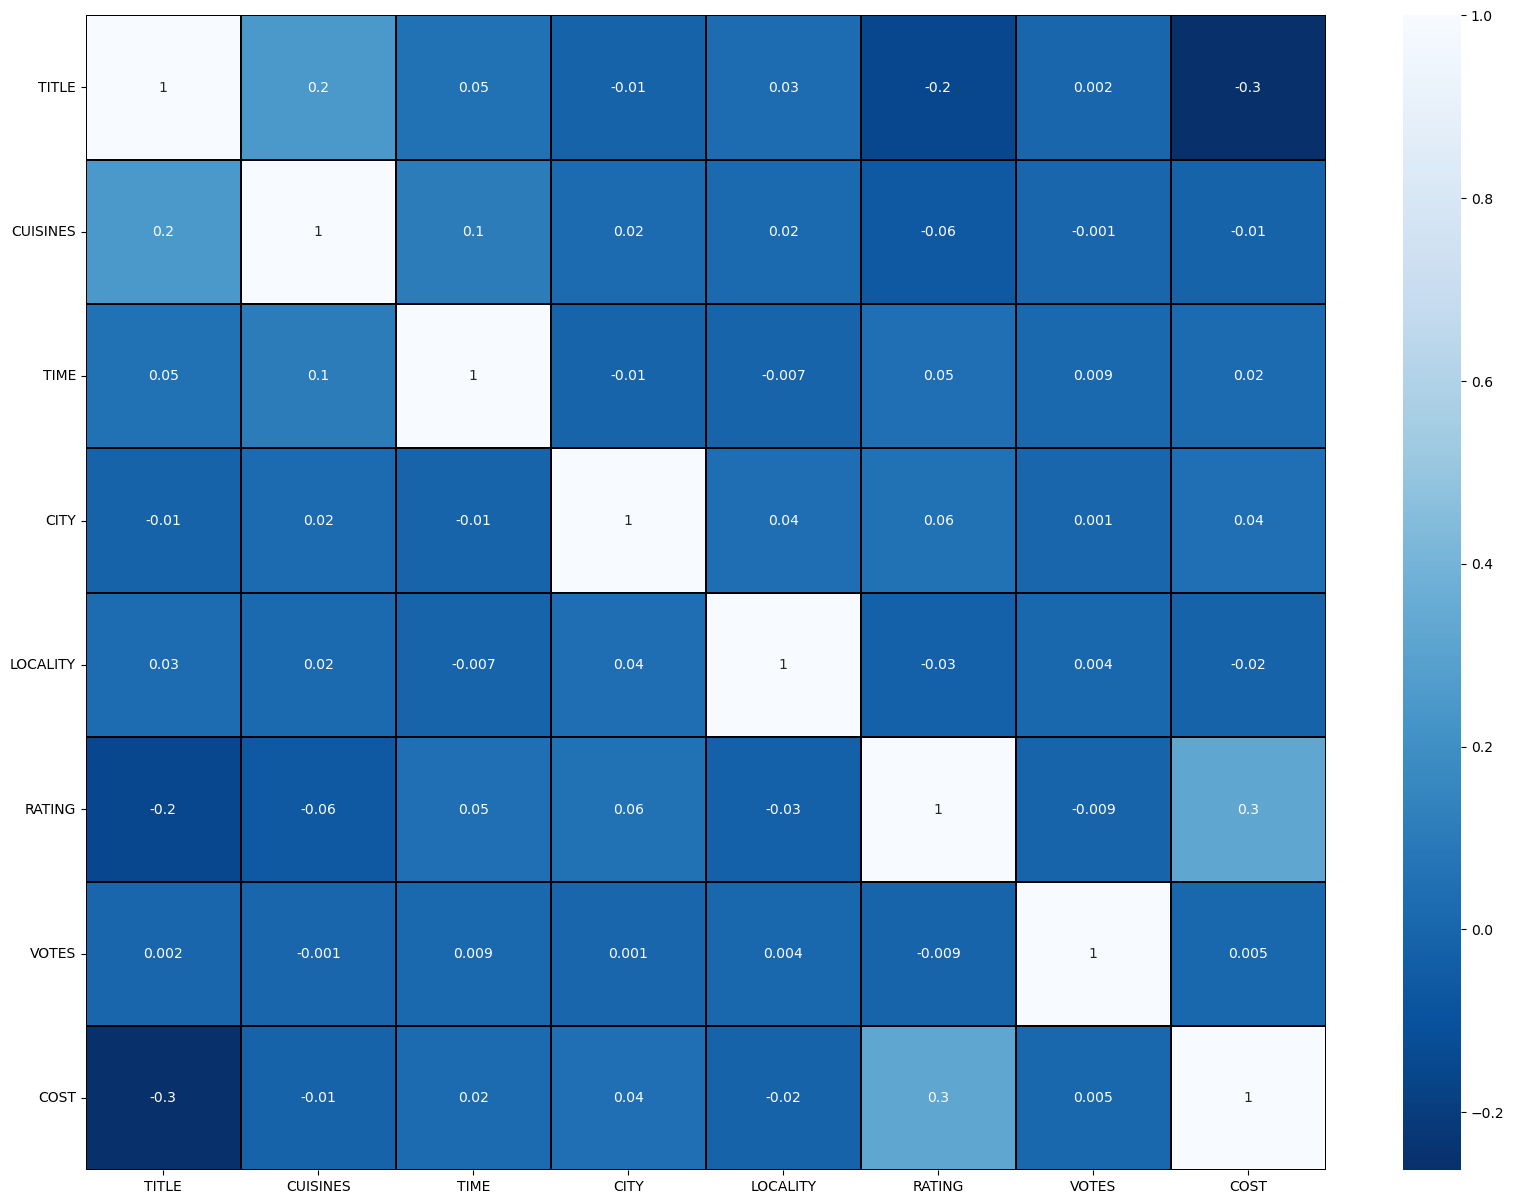

In [44]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()

In [45]:
x=df1.drop('COST',axis=1)

In [46]:
y=df1['COST']

Feature scaling using StandardScaler method.

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [48]:
x

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.869061,0.326307,-0.586396,2.116268,-0.928523,-0.494690,0.646175
1,-0.808027,-1.615839,0.931842,-0.907848,0.982826,1.045012,-0.040853
2,-0.869061,0.616217,-0.689732,-0.907848,1.120965,0.018544,-0.539367
3,1.084027,1.574830,-1.201111,0.944871,-1.302755,0.788395,-0.382272
4,-0.289238,-0.388914,-0.750673,0.944871,-0.087128,0.018544,-1.046260
...,...,...,...,...,...,...,...
12618,1.084027,0.581328,-0.049846,-0.142855,-0.785360,0.018544,0.794892
12619,-0.808027,-0.075745,-0.006127,0.944871,-1.310290,1.301629,-1.630653
12620,0.351619,-0.121433,-0.059120,1.148073,1.726267,0.531778,0.960365
12621,-0.869061,1.056481,0.868250,-0.907848,-0.059500,-0.751307,0.055499


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.091262,TITLE
1,1.076049,CUISINES
2,1.015382,TIME
3,1.005933,CITY
4,1.003137,LOCALITY
5,1.033896,RATING
6,1.000240,VOTES


As we can seee there is no multicorrelation present in the dataset so we can now ahead of model building.

Model Bulding

As you can see this is Regression problem in this we have continous data so we use regression model here.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [51]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Maximum r2 score is',maxAccu,'On random states',maxRs)

Maximum r2 score is 0.18888027303793453 On random states 177


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor

In [53]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)
pred_Lr=Lr.predict(x_test)
pred_train=Lr.predict(x_train)
print(Lr)
print('R2_score:',r2_score(y_test,pred_Lr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_Lr))
print('Mean squared error:',mean_squared_error(y_test,pred_Lr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_Lr)))

LinearRegression()
R2_score: 0.16422250817313233
R2_score on train data: 15.63790460593223
Mean absolute error: 349.10861821845276
Mean squared error: 295117.54680407146
Root mean squared error: 543.2472243869005


In [54]:
Rfr=RandomForestRegressor()
Rfr.fit(x_train,y_train)
pred_Rfr=Rfr.predict(x_test)
pred_train=Rfr.predict(x_train)
print(Rfr)
print('R2_score:',r2_score(y_test,pred_Rfr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_Rfr))
print('Mean squared error:',mean_squared_error(y_test,pred_Rfr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_Rfr)))

RandomForestRegressor()
R2_score: 0.7045583518194558
R2_score on train data: 96.07656679378206
Mean absolute error: 189.88203375766145
Mean squared error: 104322.04179632929
Root mean squared error: 322.98922860728544


In [55]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean squared error:',mean_squared_error(y_test,pred_knn))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_score: 0.4146314209322569
R2_score on train data: 59.970532336910765
Mean absolute error: 275.3671287128713
Mean squared error: 206696.80712871288
Root mean squared error: 454.63920544615695


In [56]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print(gbr)
print('R2_score:',r2_score(y_test,pred_gbr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error:',mean_squared_error(y_test,pred_gbr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

GradientBoostingRegressor()
R2_score: 0.7334852204635718
R2_score on train data: 72.6555412556523
Mean absolute error: 195.76353355358222
Mean squared error: 94107.80823003035
Root mean squared error: 306.7699597907695


In [57]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print(ls)
print('R2_score:',r2_score(y_test,pred_ls))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_ls))
print('Mean squared error:',mean_squared_error(y_test,pred_ls))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Lasso(alpha=0.001)
R2_score: 0.16422277509607086
R2_score on train data: 15.637904604174768
Mean absolute error: 349.1083632082886
Mean squared error: 295117.45255214005
Root mean squared error: 543.2471376382392


In [58]:
rg=Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
pred_train=rg.predict(x_train)
print(rg)
print('R2_score:',r2_score(y_test,pred_rg))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rg))
print('Mean squared error:',mean_squared_error(y_test,pred_rg))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_rg)))

Ridge(alpha=0.0001)
R2_score: 0.1642225083822847
R2_score on train data: 15.637904605932217
Mean absolute error: 349.10861794283807
Mean squared error: 295117.54673021863
Root mean squared error: 543.247224318927


In [59]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error:',mean_squared_error(y_test,pred_dtr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

DecisionTreeRegressor()
R2_score: 0.3901884828490769
R2_score on train data: 99.99886963786663
Mean absolute error: 243.5520792079208
Mean squared error: 215327.7405940594
Root mean squared error: 464.0342019658243


In [60]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print(etr)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('Mean squared error:',mean_squared_error(y_test,pred_etr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_etr)))

ExtraTreesRegressor()
R2_score: 0.7213398854703997
R2_score on train data: 99.99868067797834
Mean absolute error: 192.19156831683168
Mean squared error: 98396.3916189703
Root mean squared error: 313.6819912251424


Now we can check cross valdiation of all the model.

In [61]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_Lr)-score.mean())*100)

[0.13875228 0.15480124 0.16904616 0.15351269 0.17140764]
0.15750400040182258
difference b/w R2_score and cross_val_score is: 0.6718507771309751


In [62]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.34120736 0.43492497 0.35181312 0.37495041 0.44738587]
0.3900563430510259
difference b/w R2_score and cross_val_score is: 2.4575077881231033


In [63]:
score3=cross_val_score(gbr,x,y)
print(score3)
print(score3.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_gbr)-score3.mean())*100)

[0.62492014 0.72690037 0.70931528 0.71259812 0.72089778]
0.6989263383259388
difference b/w R2_score and cross_val_score is: 3.455888213763303


In [64]:
score4=cross_val_score(ls,x,y)
print(score4)
print(score4.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_ls)-score4.mean())*100)

[0.13875254 0.15480138 0.16904631 0.1535125  0.17140777]
0.15750409885592212
difference b/w R2_score and cross_val_score is: 0.6718676240148741


In [65]:
score5=cross_val_score(rg,x,y)
print(score5)
print(score5.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_rg)-score5.mean())*100)

[0.13875228 0.15480124 0.16904616 0.15351269 0.17140764]
0.1575040004270724
difference b/w R2_score and cross_val_score is: 0.6718507955212283


In [66]:
score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_dtr)-score6.mean())*100)

[0.47247041 0.27081015 0.50203794 0.50131346 0.45340017]
0.4400064279319751
difference b/w R2_score and cross_val_score is: -4.981794508289816


In [67]:
score7=cross_val_score(etr,x,y)
print(score7)
print(score7.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_etr)-score7.mean())*100)

[0.63957554 0.73283423 0.72465851 0.7040753  0.73252124]
0.7067329645169036
difference b/w R2_score and cross_val_score is: 1.4606920953496139


In [68]:
score8=cross_val_score(Rfr,x,y)
print(score8)
print(score8.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_Rfr)-score8.mean())*100)

[0.6446995  0.68426315 0.71621067 0.72010102 0.76617981]
0.7062908304559526
difference b/w R2_score and cross_val_score is: -0.1732478636496837


As we can see above all model R2_score and crossval_score is less and score mean is 70% in RandomForestRegressor() model so this is the best model.

Hyper Parametr Tunning

In [69]:
from sklearn.model_selection import RandomizedSearchCV
param={'criterion':['squared_error', 'absolute_error']}
rscv=RandomizedSearchCV(RandomForestRegressor(),param,cv=3)
rscv.fit(x_train,y_train)
rscv.best_params_

{'criterion': 'squared_error'}

In [70]:
model=RandomForestRegressor(criterion='squared_error')
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


r2_score: 0.7116842733644955
Mean absolute error: 190.35912418670438
Mean squared error: 101805.8404082139
Root mean squared error: 319.0702750307742


Saving the Model

In [71]:
import joblib
import pickle
filename='Restaurant cost'
pickle.dump(model,open(filename,'wb'))

In [72]:
df2=pd.read_excel("Data_Test.xlsx")

In [73]:
df2

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In this test dataset contains both Numerical and Categorical data are present

EDA(Exploratory Data Analysis)

In [74]:
df2.shape

(4231, 8)

This Test Dataset contains 4231 rows and 8 columns

In [75]:
df2.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [76]:
df2.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [77]:
df2.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

As we can see above dataset there is some of the columns has nan value/missing values present in dataset so here we can't drop those columns instead we can manage using mean of the value here.

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


<Axes: >

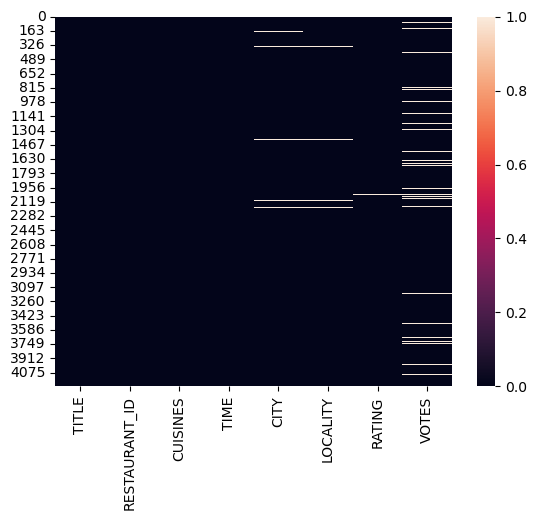

In [79]:
sns.heatmap(df2.isnull())

In [80]:
df2['RATING'].value_counts()

3.8    414
3.9    405
4.0    399
3.7    351
3.6    310
4.1    281
4.2    245
NEW    223
3.5    217
3.4    202
4.3    184
-      177
4.4    122
3.3    120
3.2     83
3.1     77
4.5     75
3.0     59
2.9     56
2.8     45
4.6     43
2.7     40
2.6     24
4.7     21
4.8     17
2.5     16
2.4      9
4.9      6
2.3      5
2.2      2
2.1      1
Name: RATING, dtype: int64

In [81]:
df2['RATING']=df2['RATING'].replace("-",np.nan)

In [82]:
df2['RATING']=df2['RATING'].replace("NEW",np.nan)

In [83]:
df2['RATING'].value_counts()

3.8    414
3.9    405
4.0    399
3.7    351
3.6    310
4.1    281
4.2    245
3.5    217
3.4    202
4.3    184
4.4    122
3.3    120
3.2     83
3.1     77
4.5     75
3.0     59
2.9     56
2.8     45
4.6     43
2.7     40
2.6     24
4.7     21
4.8     17
2.5     16
2.4      9
4.9      6
2.3      5
2.2      2
2.1      1
Name: RATING, dtype: int64

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         3829 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


As we can see rating has string datatype so here we have to change manually string data type to float data type.

In [85]:
df2['RATING']=df2['RATING'].astype(float)
df2['RATING'].dtypes

dtype('float64')

Encoding technique (here we are using encoding method to change categorical data to numerical data.)

In [86]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df2.columns:
    if df2[i].dtypes=='object':
        df2[i]=oe.fit_transform(df2[i].values.reshape(-1,1))
        df2

In [87]:
df2

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23.0,4085,1293.0,503.0,110.0,662.0,4.3,823.0
1,75.0,12680,1632.0,933.0,96.0,221.0,4.2,871.0
2,23.0,1411,1455.0,219.0,96.0,411.0,3.8,575.0
3,66.0,204,208.0,1071.0,41.0,456.0,3.8,179.0
4,75.0,13453,1637.0,208.0,78.0,300.0,3.6,394.0
...,...,...,...,...,...,...,...,...
4226,23.0,9057,1425.0,103.0,108.0,597.0,3.9,487.0
4227,66.0,1247,267.0,262.0,9.0,237.0,4.3,722.0
4228,75.0,8617,679.0,1052.0,41.0,696.0,3.7,789.0
4229,75.0,6485,1541.0,215.0,78.0,332.0,NaN,NaN


In [88]:
df2.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING           402
VOTES            402
dtype: int64

In [89]:
for i in df2.columns:
    print(df2[i].value_counts())
    print('\n')

75.0    1416
23.0    1258
66.0     284
15.0     223
39.0     126
        ... 
29.0       1
36.0       1
84.0       1
37.0       1
14.0       1
Name: TITLE, Length: 86, dtype: int64


15454    3
12799    3
7656     3
1619     3
11169    3
        ..
4318     1
636      1
7425     1
3631     1
2421     1
Name: RESTAURANT_ID, Length: 4127, dtype: int64


1212.0    213
1173.0    190
1597.0    174
771.0      78
449.0      59
         ... 
1640.0      1
1204.0      1
715.0       1
736.0       1
1541.0      1
Name: CUISINES, Length: 1727, dtype: int64


242.0    447
503.0    146
480.0    134
256.0    109
63.0      74
        ... 
478.0      1
992.0      1
139.0      1
450.0      1
215.0      1
Name: TIME, Length: 1183, dtype: int64


9.0      686
18.0     681
55.0     639
96.0     589
78.0     472
        ... 
136.0      1
97.0       1
123.0      1
82.0       1
114.0      1
Name: CITY, Length: 151, dtype: int64


296.0    54
355.0    54
819.0    53
379.0    52
197.0    50
         ..
322.0   

In [90]:
df2


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23.0,4085,1293.0,503.0,110.0,662.0,4.3,823.0
1,75.0,12680,1632.0,933.0,96.0,221.0,4.2,871.0
2,23.0,1411,1455.0,219.0,96.0,411.0,3.8,575.0
3,66.0,204,208.0,1071.0,41.0,456.0,3.8,179.0
4,75.0,13453,1637.0,208.0,78.0,300.0,3.6,394.0
...,...,...,...,...,...,...,...,...
4226,23.0,9057,1425.0,103.0,108.0,597.0,3.9,487.0
4227,66.0,1247,267.0,262.0,9.0,237.0,4.3,722.0
4228,75.0,8617,679.0,1052.0,41.0,696.0,3.7,789.0
4229,75.0,6485,1541.0,215.0,78.0,332.0,NaN,NaN


In [91]:
df2['CITY']=df2['CITY'].fillna(df2['CITY'].mean())

In [92]:
df2['LOCALITY']=df2['LOCALITY'].fillna(df2['LOCALITY'].mean())

In [93]:
df2['RATING']=df2['RATING'].fillna(df2['RATING'].mean())

In [120]:
df2['VOTES']=df2['VOTES'].fillna(df2['VOTES'].mean())

In [121]:
df2.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
dtype: int64

<Axes: >

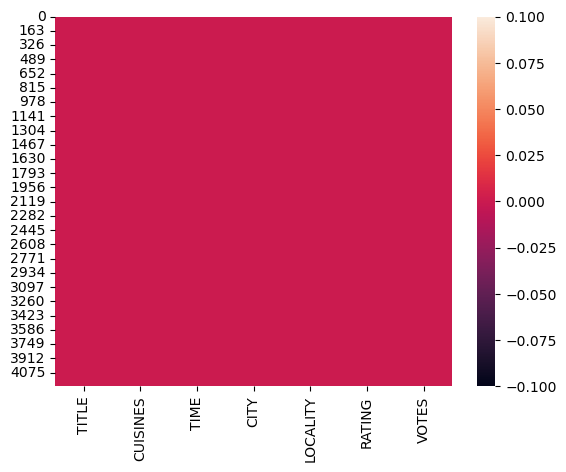

In [122]:
sns.heatmap(df2.isnull())

now we can clearly visualize that there is no missing data present in the dataset.

Checking number of unique value in each columns.

In [123]:
df2.nunique().to_frame('number of unique values')

,number of unique values
TITLE,86
CUISINES,1727
TIME,1183
CITY,152
LOCALITY,835
RATING,30
VOTES,1137


Description of dataset(it gives the statistical summary of numerical columns)

In [125]:
df2.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000
mean,45.781612,928.372489,523.118884,58.689704,383.992859,3.781536,567.520763
std,26.409174,498.480193,340.539440,38.444790,234.773853,0.412295,307.184625
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.100000,0.000000
25%,23.000000,484.000000,242.000000,18.000000,192.000000,3.600000,329.000000
50%,42.000000,1008.000000,480.000000,55.000000,355.000000,3.800000,567.520763
75%,75.000000,1320.000000,840.500000,96.000000,581.500000,4.000000,818.500000
max,85.000000,1726.000000,1182.000000,150.000000,833.000000,4.900000,1135.000000


This gives the stastical information of the numerical columns.the summary of the above dataset looks perfect.since there is no negative /invalid values present. Here Mean is greater than Median means right skwness present in the dataset. As we can see 75th percentile and Max values are high so there is outliers present in the dataset.

Data Visulization

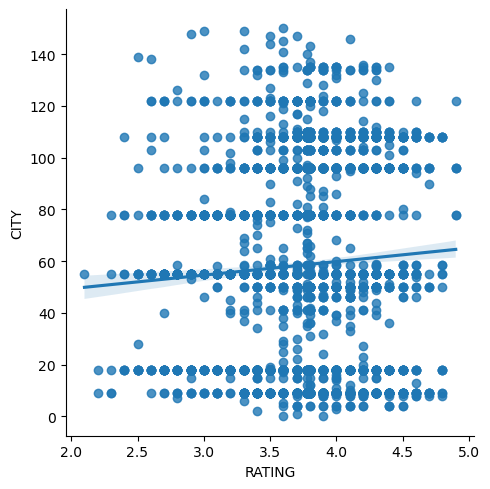

In [126]:
sns.lmplot(x='RATING',y='CITY',data=df2,palette='colorblind')

Here we are checking outliers.

TITLE          Axes(0.125,0.786098;0.0824468x0.0939024)
CUISINES    Axes(0.223936,0.786098;0.0824468x0.0939024)
TIME        Axes(0.322872,0.786098;0.0824468x0.0939024)
CITY        Axes(0.421809,0.786098;0.0824468x0.0939024)
LOCALITY    Axes(0.520745,0.786098;0.0824468x0.0939024)
RATING      Axes(0.619681,0.786098;0.0824468x0.0939024)
VOTES       Axes(0.718617,0.786098;0.0824468x0.0939024)
dtype: object

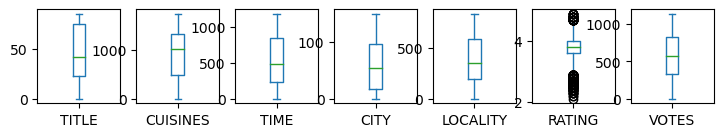

In [127]:
df2.plot(kind='box',subplots=True,layout=(7,8),figsize=(10,10))

As we have found outliers in the column rating.To remove outliers Zscore is using here.

In [128]:
from scipy.stats import zscore
out_features=df2[['RATING']]
z=np.abs(zscore(out_features))
z

,RATING
0,1.257658
1,1.015084
2,0.044790
3,0.044790
4,0.440358
...,...
4226,0.287363
4227,1.257658
4228,0.197784
4229,0.000000


In [129]:
threshold=3
np.where(z>3)

(array([  78,  716,  875,  888,  932, 1130, 1173, 1301, 1308, 1467, 1506,
        1550, 1620, 1649, 1659, 1785, 1796, 1919, 2121, 2178, 2282, 2315,
        2357, 2490, 2594, 3130, 3229, 3321, 3386, 3554, 3788, 3843, 3857],
       dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [130]:
df3=df2[(z<3).all(axis=1)]

In [131]:
df3.shape

(4198, 7)

In [132]:
print('old dataframe:',df2.shape[0])
print('new dataframe:',df3.shape[0])

old dataframe: 4231
new dataframe: 4198


In [133]:
print('datalosspercentage:',((df2.shape[0]-df3.shape[0])/df2.shape[0])*100)

datalosspercentage: 0.779957456865989


As you can see there is less percentage of data loss after removing the outliers so it is considerable.

In [134]:
df3

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23.0,1293.0,503.0,110.0,662.0,4.300000,823.000000
1,75.0,1632.0,933.0,96.0,221.0,4.200000,871.000000
2,23.0,1455.0,219.0,96.0,411.0,3.800000,575.000000
3,66.0,208.0,1071.0,41.0,456.0,3.800000,179.000000
4,75.0,1637.0,208.0,78.0,300.0,3.600000,394.000000
...,...,...,...,...,...,...,...
4226,23.0,1425.0,103.0,108.0,597.0,3.900000,487.000000
4227,66.0,267.0,262.0,9.0,237.0,4.300000,722.000000
4228,75.0,679.0,1052.0,41.0,696.0,3.700000,789.000000
4229,75.0,1541.0,215.0,78.0,332.0,3.781536,567.520763


Checking the Skewness

In [135]:
df2.skew()

TITLE      -0.019891
CUISINES   -0.211171
TIME        0.314497
CITY        0.073794
LOCALITY    0.306208
RATING     -0.598758
VOTES      -0.005132
dtype: float64

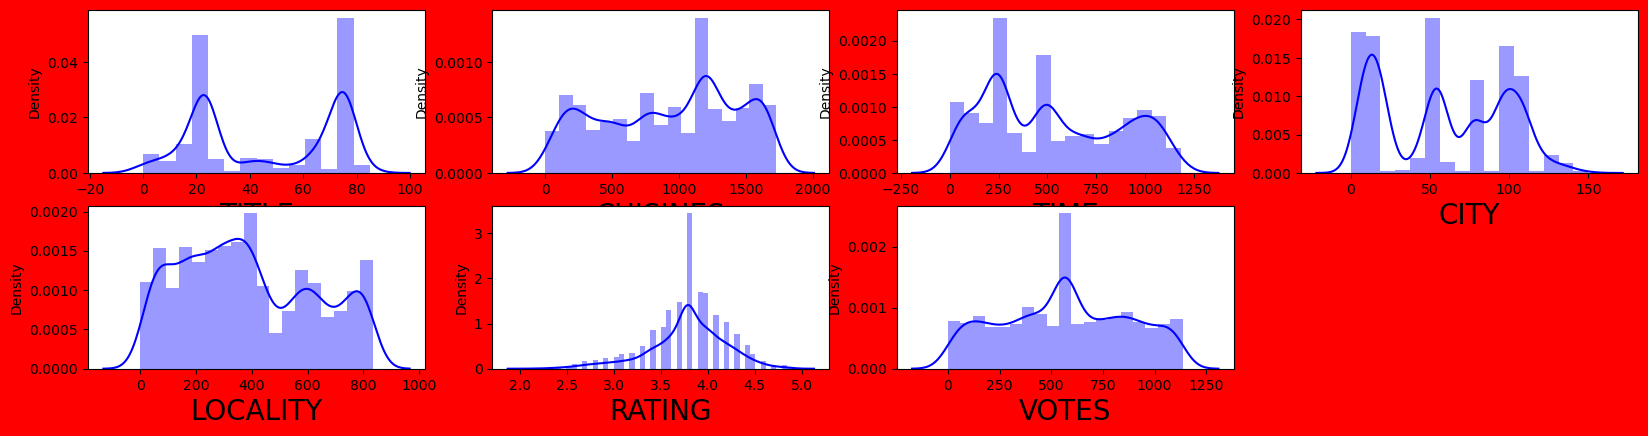

In [136]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df2:
    if num<=24:
        ax=plt.subplot(10,4,num)
        sns.distplot(df2[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()



From above distribution plots we can notice that data in most looks normal. 

In [137]:
df2.corr()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
TITLE,1.000000,0.255418,0.053989,-0.015641,0.040220,-0.131630,-0.003221
CUISINES,0.255418,1.000000,0.111537,0.012862,0.023805,-0.070835,0.018064
TIME,0.053989,0.111537,1.000000,0.037968,-0.015238,0.031686,0.018676
CITY,-0.015641,0.012862,0.037968,1.000000,0.025487,0.056156,0.000414
LOCALITY,0.040220,0.023805,-0.015238,0.025487,1.000000,-0.027571,0.011226
RATING,-0.131630,-0.070835,0.031686,0.056156,-0.027571,1.000000,-0.012821
VOTES,-0.003221,0.018064,0.018676,0.000414,0.011226,-0.012821,1.000000


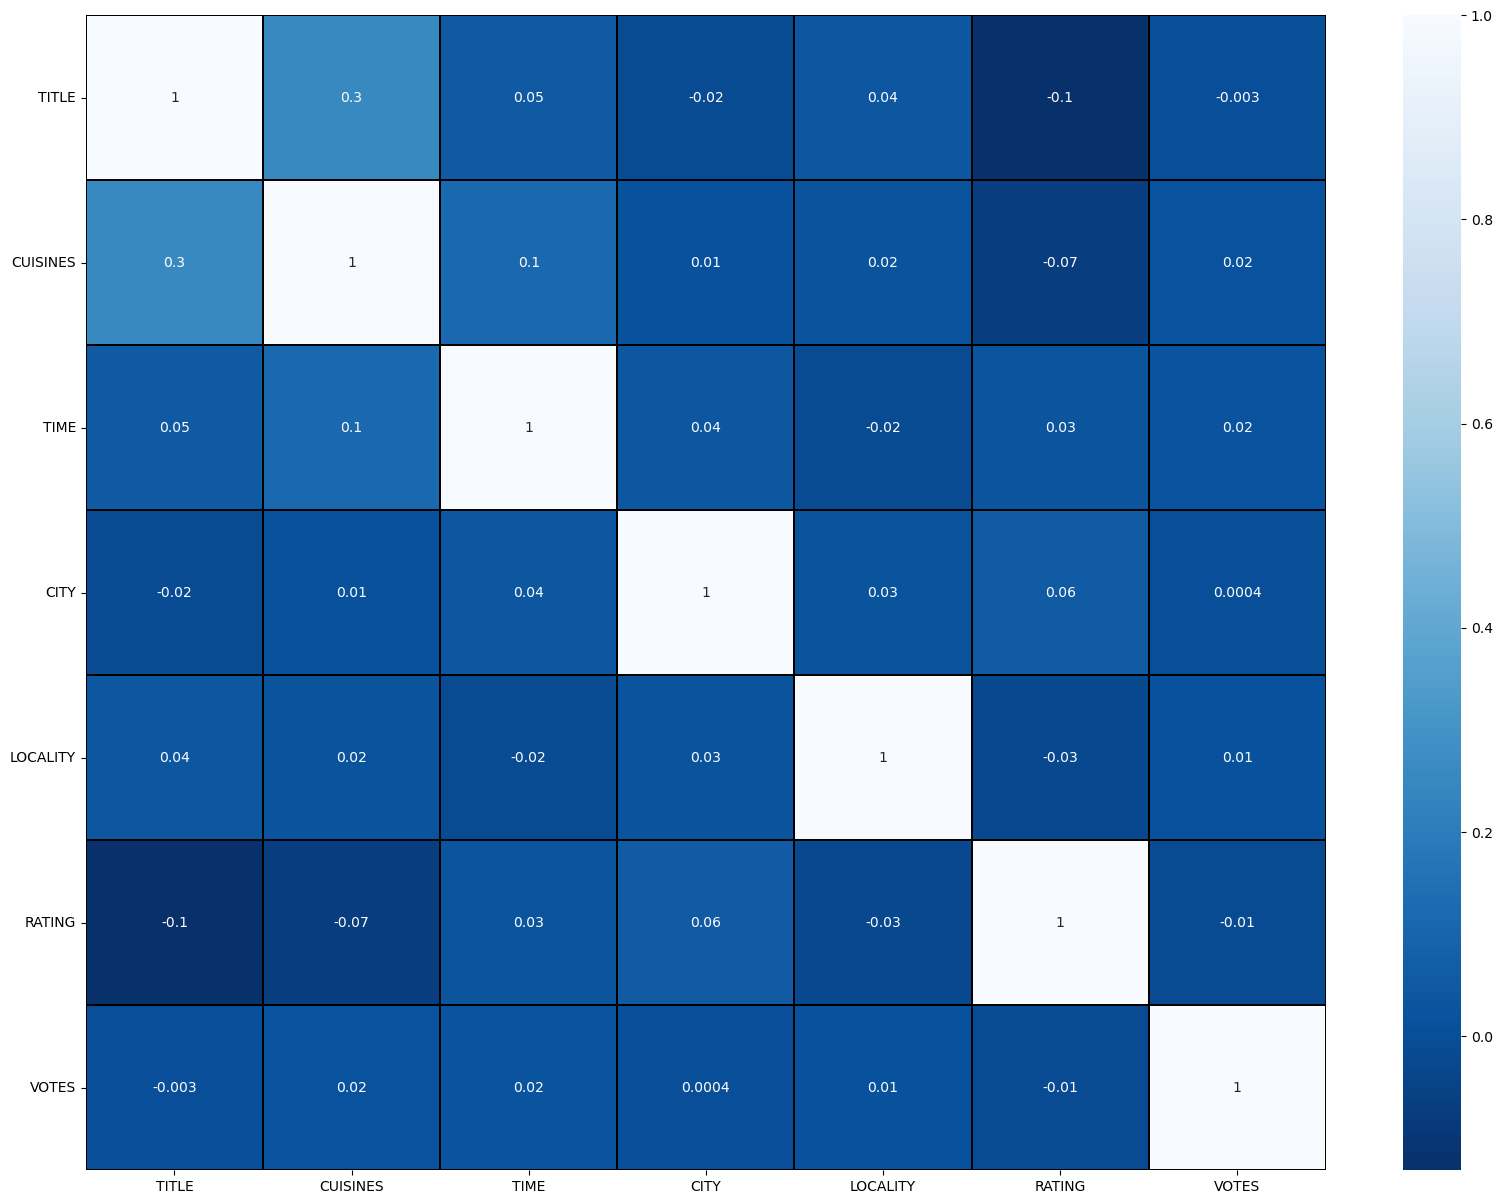

In [138]:
plt.figure(figsize=(20,15))
sns.heatmap(df2.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()
                   

In [139]:
x=df3

Feature scaling using StandardScaler method.

In [140]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [141]:
x

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.862147,0.733542,-0.061965,1.330977,1.181174,1.284037,0.830605
1,1.106692,1.413398,1.201252,0.966979,-0.696019,1.031124,0.987021
2,-0.862147,1.058429,-0.896276,0.966979,0.112749,0.019473,0.022461
3,0.765931,-1.442399,1.606657,-0.463013,0.304300,0.019473,-1.267963
4,1.106692,1.423425,-0.928591,0.498982,-0.359741,-0.486352,-0.567354
...,...,...,...,...,...,...,...
4193,-0.862147,0.998264,-1.237051,1.278978,0.904491,0.272386,-0.264300
4194,0.765931,-1.324076,-0.769954,-1.295008,-0.627912,1.284037,0.501482
4195,1.106692,-0.497820,1.550840,-0.463013,1.325901,-0.233440,0.719811
4196,1.106692,1.230900,-0.908027,0.498982,-0.223528,-0.027226,-0.001911


In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.090973,TITLE
1,1.084952,CUISINES
2,1.016479,TIME
3,1.004675,CITY
4,1.003994,LOCALITY
5,1.025010,RATING
6,1.001268,VOTES


As we can see there no is multicorrelation present in the dataset.
So now we can  load the  saved data here.

In [145]:
import pickle
load_model=pickle.load(open('Restaurant cost','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

71.16842733644955
